In [63]:
## Load Required Packages
using XLSX
using DataFrames

"""
Read XLSX using only XLSX.jl primitives and drop rows with any missing.

Parameters
----------
path  :: AbstractString
sheet :: Union{Nothing,String}   # first sheet if `nothing`

Returns
-------
DataFrame
"""
function load_and_clean(path::AbstractString; sheet::Union{Nothing,String}=nothing)
    xf = XLSX.readxlsx(path)
    shname = isnothing(sheet) ? first(XLSX.sheetnames(xf)) : sheet
    sh = xf[shname]                         # Worksheet

    A = sh[:]                               # matriz con encabezados en la 1ª fila
    headers = Symbol.(string.(A[1, :]))     # convierte a Symbol
    df = DataFrame(A[2:end, :], headers)    # datos desde la 2ª fila

    dropmissing!(df)
    return df
end

# Uso
xlsx_path = raw"C:\Users\User\Desktop\CausalAI-Course\data\Districtwise_literacy_rates.xlsx"
df = load_and_clean(xlsx_path)              # o load_and_clean(xlsx_path; sheet="mysheet")


625×100 DataFrame
 Row │ STATCD  DISTCD  STATNAME         DISTNAME                   DISTRICTS   ⋯
     │ Any     Any     Any              Any                        Any         ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 1       101     JAMMU & KASHMIR  KUPWARA                    1           ⋯
   2 │ 1       102     JAMMU & KASHMIR  BARAMULA                   1
   3 │ 1       103     JAMMU & KASHMIR  SRINAGAR                   1
   4 │ 1       104     JAMMU & KASHMIR  BADGAM                     1
   5 │ 1       105     JAMMU & KASHMIR  PULWAMA                    1           ⋯
   6 │ 1       106     JAMMU & KASHMIR  ANANTNAG                   1
   7 │ 1       107     JAMMU & KASHMIR  LEH (LADAKH)               1
   8 │ 1       108     JAMMU & KASHMIR  KARGIL                     1
   9 │ 1       109     JAMMU & KASHMIR  DODA                       1           ⋯
  10 │ 1       110     JAMMU & KASHMIR  UDHAMPUR                   1
  11 │ 1       111     JAMMU & KASHMIR  PUNCH                      1
  ⋮  │   ⋮       ⋮            ⋮                     ⋮                  ⋮       ⋱
 616 │ 36      3601    TELANGANA        ADILABAD                   1
 617 │ 36      3602    TELANGANA        NIZAMABAD                  1           ⋯
 618 │ 36      3603    TELANGANA        KARIMNAGAR                 1
 619 │ 36      3604    TELANGANA        MEDAK                      1
 620 │ 36      3605    TELANGANA        HYDERABAD                  1
 621 │ 36      3606    TELANGANA        RANGA REDDY                1           ⋯
 622 │ 36      3607    TELANGANA        MAHBUBNAGAR                1
 623 │ 36      3608    TELANGANA        NALGONDA                   1
 624 │ 36      3609    TELANGANA        WARANGAL                   1
 625 │ 36      3610    TELANGANA        KHAMMAM                    1           ⋯
                                                 95 columns and 604 rows omitted

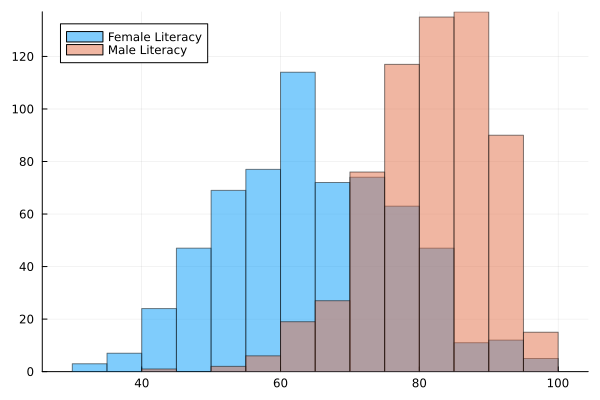

In [43]:
using StatsPlots   # este es el que soporta la macro @df

@df df histogram(:FEMALE_LIT,
    bins=20, alpha=0.5, label="Female Literacy")

@df df histogram!(:MALE_LIT,
    bins=20, alpha=0.5, label="Male Literacy")
